# KMeans clustering algorithm in sklearn

.. currentmodule:: sklearn




## Load from Fiona

load the kyc dataset names 'final_clustering_file.csv' (After cleaning and labelling) 

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_cluster = pd.read_csv('final_clustering_file.csv')
df_label = pd.read_csv('suspicious_name_list().csv')
df_trans_weight = pd.read_csv('transaction_weight.csv')

In [3]:
df_cluster.columns

Index(['Gender', 'Age', 'Tenure', 'cust_id', 'OpenSanc_query',
       'no_wire_trxns_sent', 'wire_total_amnt_sent',
       'no_international_wire_trxns_sent', 'no_wire_trxns_received',
       'wire_total_amnt_received',
       ...
       'transportation_msgs', 'trafficking_msgs', 'law_accomodation_msgs',
       'Name', 'Label_Money_Laundry', 'Label_Filtered_By_Occupations',
       'Label_Filtered_By_Wire_EMT', 'type_buyer', 'type_seller',
       'similarity_score'],
      dtype='object', length=109)

In [4]:
df_trans_weight

,id,Name,emt,wire,label,Buyer,Seller,weight
0,CUST70977942,LUCAS-NICOLAS GIGU??RE,1.0,NaN,1.0,NaN,1.0,1.000
1,EXTERNAL907939,LAGAN DESAI,1.0,NaN,1.0,NaN,1.0,1.000
2,CUST33059790,DR.JOHN WADE,1.0,NaN,1.0,NaN,1.0,1.000
3,CUST73457399,KIMBERLY BEST,1.0,NaN,1.0,NaN,1.0,1.000
4,CUST45674350,DAVID COOLEY,1.0,NaN,1.0,NaN,1.0,1.000
...,...,...,...,...,...,...,...,...
1345,CUST85800529,ADRIAN WOODWARD,NaN,NaN,NaN,NaN,NaN,0.018
1346,CUST86680420,SARAH SANTOS,NaN,NaN,NaN,NaN,NaN,0.018
1347,CUST88247060,PAUL L??VESQUE-BOILY,NaN,NaN,NaN,NaN,NaN,0.018
1348,CUST88799361,DR.EMILY JONES,NaN,NaN,NaN,NaN,NaN,0.018


In [5]:
id_set = set(df_label['id'])

#### Create a new column 'Label_Filtered'
df_cluster['Label_Filtered'] = df_cluster['cust_id'].apply(lambda x: 1 if x in id_set else 0)

In [6]:
def lookup_weight(cust_id):

    matching_row = df_trans_weight[df_trans_weight['id'] == cust_id]
    if not matching_row.empty:
        return matching_row['weight'].iloc[0]
    else:
        return 0

In [7]:
df_cluster['network_score'] = df_cluster['cust_id'].apply(lambda x: lookup_weight(x))

In [35]:
df_cluster['Label_Filtered_network'] = (df_cluster['network_score'] > 0.2).astype(int)

### Cash transaction & crime
#### apply t-SNE to dataset, reduce the transactional behavior features

In [18]:
select_col = ['total_cash_deposit','no_cash_withdraws','no_cash_deposits','total_cash_deposit']

In [19]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

def apply_tsne(df, select_col):
    """
    First define and select target col
    Then apply t-SNE to the selected columns of the DataFrame.

    Parameters:
    - df (DataFrame): The input DataFrame.
    - select_col (list): List of column names to select from the DataFrame.

    Returns:
    - tsne_df (DataFrame): DataFrame containing the t-SNE transformed data.
    """
    X = df[select_col]
    
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(X)

    #### Apply t-SNE
    tsne = TSNE(n_components=2, random_state=42)
    tsne_result = tsne.fit_transform(data_scaled)
    
    #### Create DataFrame for t-SNE results
    tsne_df = pd.DataFrame(tsne_result, columns=['dr1', 'dr2'])

    return tsne_df


In [20]:
tsne_df = apply_tsne(df_cluster, select_col)


In [21]:
tsne_df

,dr1,dr2
0,-49.277512,-34.803780
1,198.781326,-223.626434
2,279.695068,-142.764145
3,189.036026,138.692123
4,266.645325,-73.386810
...,...,...
195784,-49.277512,-34.803780
195785,-49.277512,-34.803780
195786,-49.277512,-34.803780
195787,103.996750,-2.328233


concat t-SNE result back to the dataset

In [22]:
df_cluster = pd.concat([df_cluster, tsne_df], axis=1)
df_cluster

,Gender,Age,Tenure,cust_id,OpenSanc_query,no_wire_trxns_sent,wire_total_amnt_sent,no_international_wire_trxns_sent,no_wire_trxns_received,wire_total_amnt_received,...,Label_Money_Laundry,Label_Filtered_By_Occupations,Label_Filtered_By_Wire_EMT,type_buyer,type_seller,similarity_score,Label_Filtered,network_score,dr1,dr2
0,0,45,13,CUST82758793,1,2,3971.5,0,0,0.0,...,0,0,0,0,0,50,0,0.0,-49.277512,-34.803780
1,1,52,8,CUST69248708,1,0,0.0,0,0,0.0,...,0,0,0,0,0,56,0,0.0,198.781326,-223.626434
2,0,43,11,CUST67222818,1,2,28263.0,1,4,22629.5,...,0,1,0,0,0,100,0,0.0,279.695068,-142.764145
3,1,35,17,CUST33995820,0,0,0.0,0,1,27385.0,...,0,0,0,0,0,56,0,0.0,189.036026,138.692123
4,1,39,21,CUST76401392,0,2,10429.0,0,3,23895.5,...,1,0,0,0,0,55,0,0.0,266.645325,-73.386810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195784,1,46,3,CUST23014082,1,0,0.0,0,0,0.0,...,0,0,0,0,0,60,0,0.0,-49.277512,-34.803780
195785,1,31,10,CUST17691251,0,0,0.0,0,1,10903.0,...,0,0,0,0,0,72,0,0.0,-49.277512,-34.803780
195786,0,21,3,CUST26444112,0,0,0.0,0,1,1466.0,...,0,0,0,0,0,51,0,0.0,-49.277512,-34.803780
195787,0,58,14,CUST96567835,0,1,7049.5,0,0,0.0,...,0,1,0,0,0,100,0,0.0,103.996750,-2.328233


### Try Clustering (using certain useful features)

In [23]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA
import plotly.graph_objects as go
import matplotlib.cm as cm

In [24]:
df_cluster.corrwith(df_cluster['Label_Filtered']).sort_values(ascending=False).head(20)

Label_Filtered                          1.000000
network_score                           0.814805
Label_Filtered_By_Wire_EMT              0.654203
type_seller                             0.484448
type_buyer                              0.440000
wildlife_msgs                           0.124473
no_emt_wildlife_msg_sent                0.104618
no_emt_wildlife_msg_received            0.073806
emt_total_amnt_sent                     0.056618
emt_total_amnt_received                 0.045647
average_emt_sent                        0.036161
no_wire_trxns_received                  0.030527
trxns_jurisdiction                      0.029679
international_trxns                     0.029582
no_emt_trxns_sent                       0.028318
no_external_wire_trxn_received          0.028039
Label_Money_Laundry                     0.027606
label                                   0.027606
no_international_wire_trxns_received    0.026661
no_external_wire_trxns                  0.026294
dtype: float64

\text{Odds Ratio} = e^{2 \times \text{Correlation}}

Or 1/(1-correlation)

### Try KMeans Clustering

In [25]:
def analyze_clusters(df_cluster, n_clusters):
    """
    Perform clustering analysis and calculate cluster counts and feature averages.

    Parameters:
    - df_cluster (DataFrame): The input DataFrame containing the data.
    - n_clusters (int): Number of clusters for KMeans algorithm.

    Returns:
    - cluster_counts (DataFrame): DataFrame containing cluster counts.
    - feature_avgs (DataFrame): DataFrame containing feature averages for each cluster.
    """
    #### Select relevant columns for clustering
    X = df_cluster[['dr1', 'dr2', 'OpenSanc_query','Label_Money_Laundry','Label_Filtered']]
    #X = df_cluster[['dr1', 'dr2', 'OpenSanc_query','Label_Filtered_By_Occupations','Label_Money_Laundry']]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    #### KMeans clustering
    kmeans = KMeans(n_clusters=n_clusters, n_init='auto', random_state=1)
    labels = kmeans.fit_predict(X_scaled)

    #### cluster labels
    df_cluster['Clusters'] = labels
    tsne_df['Clusters'] = labels

    #### Output
    cluster_counts = pd.DataFrame(labels, columns=['Clusters']).value_counts()
    feature_avgs = df_cluster.groupby('Clusters').mean()

    return cluster_counts, feature_avgs


In [26]:
cluster_counts, feature_avgs = analyze_clusters(df_cluster, n_clusters=3)


In [27]:
cluster_counts

Clusters
1           120736
2            49006
0            26047
dtype: int64

assign weight or label 1/0 

In [28]:
feature_avgs[['Label_Money_Laundry','network_score','Label_Filtered','type_buyer','type_seller']]

,Label_Money_Laundry,network_score,Label_Filtered,type_buyer,type_seller
Clusters,,,,,
0,0.118517,0.002580,0.001766,0.000691,0.000768
1,0.014387,0.000435,0.000000,0.000033,0.000041
2,0.014080,0.000410,0.000000,0.000000,0.000102


In [29]:
df_cluster[df_cluster['Clusters']==0].to_csv('cluster0cash.csv')

In [30]:
df_cluster['criminal_cash'] = df_cluster['Clusters'].apply(lambda x: 1 if x == 0 else 0)

In [31]:
calculate_odd_with_label(df_cluster, 'criminal_cash')

C:\Users\zheng\AppData\Local\Temp\ipykernel_10852\617184629.py:5: RuntimeWarning: divide by zero encountered in longlong_scalars
  odds_ratio = (cross_tab.iloc[1, 1] * cross_tab.iloc[0, 0]) / (cross_tab.iloc[1, 0] * cross_tab.iloc[0, 1])


inf

In [37]:
table_criminal_cash = df_cluster.groupby('criminal_cash').mean()
table_criminal_cash

,Gender,Age,Tenure,OpenSanc_query,no_wire_trxns_sent,wire_total_amnt_sent,no_international_wire_trxns_sent,no_wire_trxns_received,wire_total_amnt_received,no_international_wire_trxns_received,...,Label_Filtered_By_Wire_EMT,type_buyer,type_seller,similarity_score,Label_Filtered,network_score,dr1,dr2,Clusters,Label_Filtered_network
criminal_cash,,,,,,,,,,,,,,,,,,,,,
0,0.649657,35.294329,6.229107,0.288709,0.140702,840.165790,0.035365,0.186931,1172.210254,0.056598,...,0.000082,0.000024,0.000059,63.226014,0.000000,0.000428,-41.796207,-5.567483,1.288709,0.000766
1,0.642838,39.342304,8.479095,0.228548,0.505087,3129.552348,0.083426,0.660076,4252.417150,0.134181,...,0.001459,0.000691,0.000768,69.988060,0.001766,0.002580,198.664749,32.918022,0.000000,0.003455


In [54]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
similarity_scores = df_cluster['similarity_score'].values.reshape(-1, 1)

scaled_similarity_scores = scaler.fit_transform(similarity_scores)

#### Update the 'similarity_score' column with the scaled values
df_cluster['similarity_score'] = scaled_similarity_scores

## Get Weight vector

In [39]:
def calculate_odd_with_label(dataset, column):
    
    cross_tab = pd.crosstab(dataset['Label_Filtered'], dataset[column])
    
    odds_ratio = (cross_tab.iloc[1, 1] * cross_tab.iloc[0, 0]) / (cross_tab.iloc[1, 0] * cross_tab.iloc[0, 1])
    
    
    return odds_ratio


In [40]:
correlation = df_cluster['network_score'].corr(df_cluster['Label_Filtered'])
network_est_odd = 1/(1-correlation)

In [41]:
cash_est_odd = table_criminal_cash.loc[1, 'Label_Filtered_network']/table_criminal_cash.loc[0, 'Label_Filtered_network']

In [42]:
odds_ratios = []

#odds_ratios.append(calculate_odd_with_label(df_cluster,'Label_Money_Laundry'))
odds_ratios.append(calculate_odd_with_label(df_cluster,'OpenSanc_query'))
odds_ratios.append(calculate_odd_with_label(df_cluster,'Label_Filtered_By_Occupations'))
odds_ratios.append(network_est_odd)
odds_ratios.append(cash_est_odd)

v = np.array(odds_ratios)

In [43]:
def softmax (v):
    
    exp_v = np.exp(v - np.max(v))
    prob = exp_v / np.sum(exp_v)
    
    return prob

In [44]:
def normalized_linear(v):
    return v / np.sum(v)


In [45]:
def sigmoid(v):
    return 1 / (1 + np.exp(-v))


In [50]:
weight_vector = softmax(odds_ratios)

In [48]:
#weight_vector = softmax(sigmoid(v))

In [51]:
weight_vector

array([0.0084664 , 0.1294701 , 0.61077491, 0.25128858])

## Compute Risk Score

In [64]:
def compute_risk_score(weight_vector, selected_columns):
    
    selected_df = df_cluster[selected_columns]
    matrix = selected_df.values
    result = np.dot(weight_vector, matrix.T)
    df = pd.DataFrame({'cust_id': df_cluster['cust_id'],'Name': df_cluster['Name'], 'result': result})
    
    return df


In [65]:
Attention = ['OpenSanc_query','similarity_score','network_score', 'criminal_cash']

In [66]:
result_df = compute_risk_score(weight_vector,Attention)

In [67]:
result_df.sort_values(by='result', ascending=False).head(20)

,cust_id,Name,result
189615,CUST47437733,MATTHEW COOPER,1.000000
134067,CUST80174234,STEVEN CRUZ,1.000000
110404,CUST45674350,DAVID COOLEY,0.991534
129043,CUST17098365,LUCIE PARADIS,0.991534
112713,CUST73457399,KIMBERLY BEST,0.991534
150817,CUST33059790,DR.JOHN WADE,0.991534
109445,CUST73707963,??LISABETH LACROIX,0.991534
18630,CUST13316799,JOANN BERRY,0.991534
51371,CUST70275199,VICTOR MARTINEZ,0.968200
142158,CUST56676120,LAURIE DURAND,0.959734


In [68]:
result_df.to_csv('Customer list.csv')

## Plot a sample

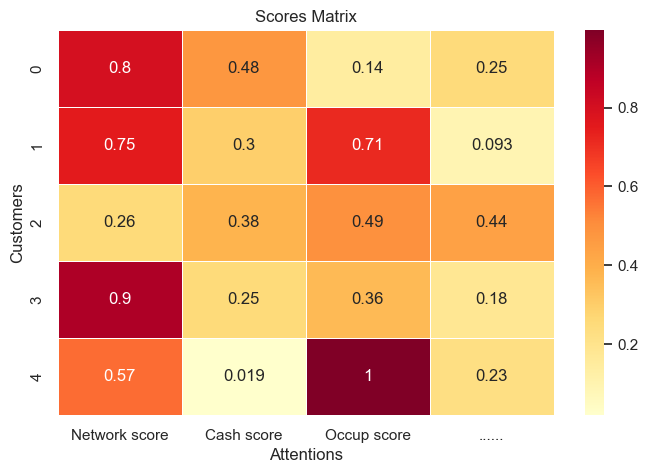

In [69]:
import numpy as np
import pandas as pd

#### with random numbers
data = np.random.rand(5, 4)
df = pd.DataFrame(data, columns=['Network score', 'Cash score', 'Occup score','......'])

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

#### Plot 
plt.figure(figsize=(8, 5))
sns.heatmap(df, annot=True, cmap='YlOrRd', linewidths=0.5)
plt.title('Scores Matrix')
plt.xlabel('Attentions')
plt.ylabel('Customers')
plt.show()

